In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
data.shape

(6497, 13)

In [27]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [28]:
#data.dropna(inplace=True)

In [29]:
#data.isna().sum()

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data.iloc[:,:] = imputer.fit_transform(data)

In [31]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
from sklearn import preprocessing

lb = preprocessing.LabelEncoder()
data["type"] = lb.fit_transform(data["type"])
data["type"].unique()

array([1, 0])

In [33]:
x=data.drop(['type'],axis=1)
y=data['type']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [35]:
pred=dtc.predict(xtest)

In [36]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest,pred)
confusion_matrix

array([[ 463,   13],
       [  13, 1461]], dtype=int64)

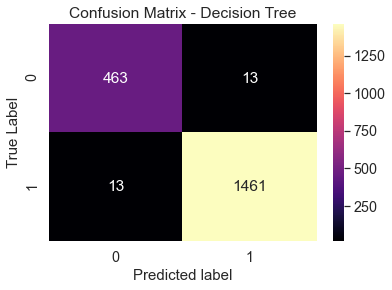

<Figure size 720x504 with 0 Axes>

In [37]:
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()

In [38]:
from sklearn.metrics  import accuracy_score

score = accuracy_score(ytest, pred)
print(score)

0.9866666666666667


In [39]:
from sklearn import tree
data=data.head()
plt.figure(figsize=(25,10))
a = tree.plot_tree(data, 
              feature_names=x.columns, 
              class_names=y, 
              filled=True, 
              fontsize=14)

TypeError:    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6   is not an estimator instance.

<Figure size 1800x720 with 0 Axes>

In [40]:
ytrain.shape

(4547,)

In [41]:
pred.shape

(1950,)